In [236]:
# importing necessary libraries 
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

uploading our dataset from a directory in the local machine

In [237]:
df = pd.read_csv(r'C:/Users/test/Documents/tochora/dd/datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [238]:
# hsape of our dataset
df.shape

(400, 5)

our dataset has 400 rows and 5 columns

In [239]:
# missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

our dataset is clean since it does not contain null values

In [240]:
#satistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


Describe function gives statistics of the values in a dataset like mean values, lower to upper Quantiles, maximum value and the number of times a column is represented in the dataset(count)

Text(0.5, 1.0, 'Outlier Detection in Purchased')

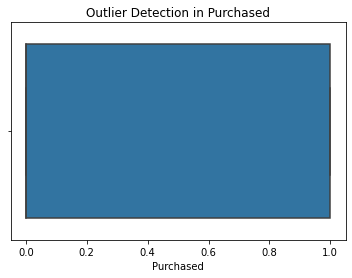

In [241]:
sns.boxplot(x=df['Purchased'])
plt.title('Outlier Detection in Purchased')

Text(0.5, 1.0, 'Outlier Detection in Estimated Salary')

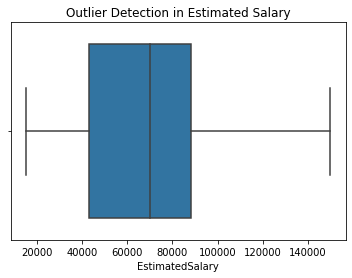

In [242]:
sns.boxplot(x=df['EstimatedSalary'])
plt.title('Outlier Detection in Estimated Salary')

Text(0.5, 1.0, 'Outlier detection in Age')

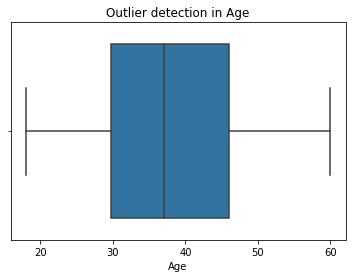

In [243]:
sns.boxplot(x=df['Age'])
plt.title('Outlier detection in Age')

The above boxplots don't have any outliers thus our dataset is clean and thus it doesn;t have noise.

Text(0.5, 1.0, 'Relationship between Gender and Estimated Salary')

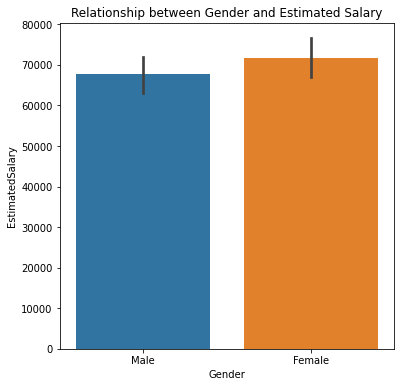

In [244]:
plt.figure(figsize=(6, 6))
sns.barplot(x='Gender', y='EstimatedSalary', data=df)
plt.title('Relationship between Gender and Estimated Salary')

the above barplot shows that females (0) earned a higher salary compared to males (1)

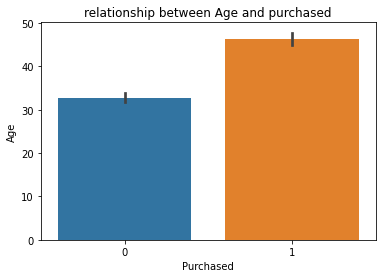

In [245]:
sns.barplot(x='Purchased', y='Age', data=df)
plt.title('relationship between Age and purchased')
plt.show()

the above barplot shows that are aged more than forty puuchased whilethose who are are approximatel aged thirty did not purchase.

Text(0.5, 1.0, 'Distribution of gender')

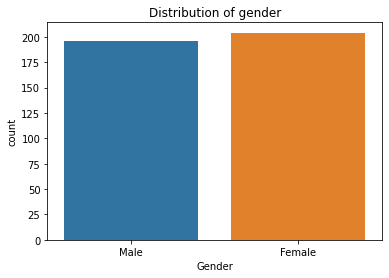

In [246]:
sns.countplot(x=df['Gender'])
plt.title('Distribution of gender')

 the above figure shows thatFemales are slightly many compared to males in our dataset

In [247]:
# mapping males and females into discrete values {dummy variables}
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.drop('User ID', axis=1,inplace=True)

Correlation

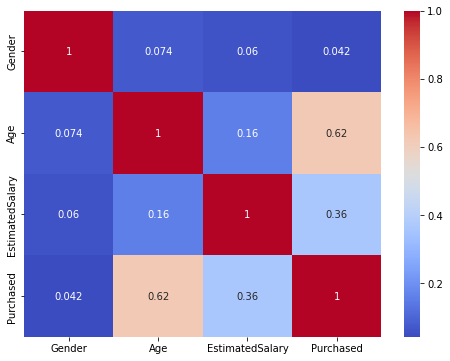

In [248]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

correlation shows linear relationship between variables ranging from -1 to 1.
Purchased and Age have the highest correlation of 62%  which means that they have a fairly positive corrrelation while Purchased and Gender have the lowest correlation of 4.2% which is very small positive correlation.This means that when Age rises,Purchases increase with a fair amount while Gender has a small influence on purchases due to their small correlation.

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Purchased'}>]], dtype=object)

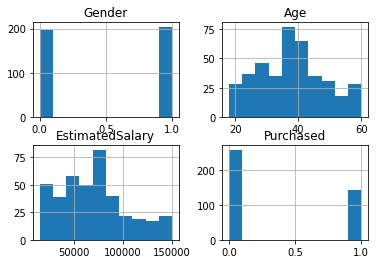

In [249]:
# Distribution of variables in our dataset
df.hist()

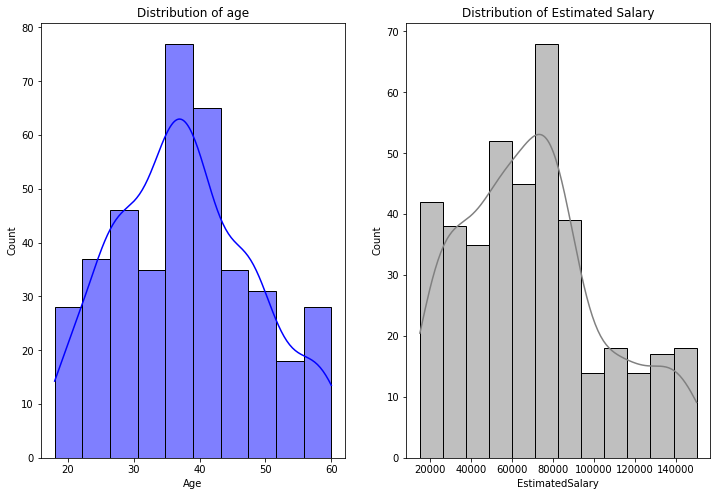

In [250]:
# Distribution of selected  variables in our dataset
fig,axes = plt.subplots(1, 2, figsize=(12, 8))
sns.histplot(ax=axes[0], x=df['Age'], kde=True,color='blue').set(title='Distribution of age')
sns.histplot(ax=axes[1], x= df['EstimatedSalary'], kde=True, color='grey').set(title='Distribution of Estimated Salary')
plt.show()

Age has a normal distribution represented by a normal curve meaning that data points are centred around the mean while Estimated Salary has a right skewed distribution meaning data points are far away from the mean.this can be corrected by normalising our data.

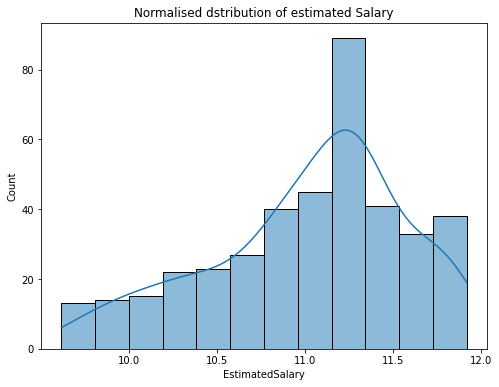

In [251]:
plt.figure(figsize=(8, 6))
sns.histplot(x= np.log(df['EstimatedSalary']), kde=True)
plt.title('Normalised dstribution of estimated Salary')
plt.show()

Segmenting our data into x and y variables. x represents other variables less purchased while y represents purchased column.

In [252]:
x = df.drop('Purchased', axis=1)
y = df['Purchased']

In [253]:
# splitting our dataset into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=30)

In [254]:
#Normalizing our data using standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [255]:
# modelling our data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# fitting our data
lr.fit(x_train, y_train)
acc = lr.score(x_test,y_test)
print(acc)

0.5289339920691161


Linear regression gives an accuracy of 52%.lets try classification using logistic regression and randomforest classifier

In [256]:
# importing logistic regresion from sklearn library
from sklearn.linear_model import LogisticRegression
lc = LogisticRegression()
#fitting our data
lc.fit(x_train, y_train)
acc = lc.score(x_test, y_test)
print(acc)

0.8875


Logistic regression gives us an accuracy of 89%

In [257]:
# importing randomforest classifer from sklearn library
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)
#fitting our data
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
print(classification_report(pred, y_test))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.84      1.00      0.91        26

    accuracy                           0.94        80
   macro avg       0.92      0.95      0.93        80
weighted avg       0.95      0.94      0.94        80



[[49  5]
 [ 0 26]]


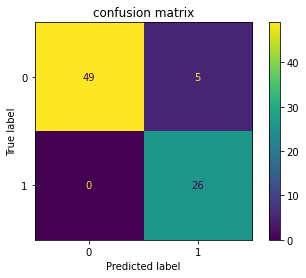

In [258]:
# confusion matrix
cm = confusion_matrix(pred, y_test, labels= clf.classes_)
print(cm)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
display.plot()
plt.title('confusion matrix')
plt.show()